# Curso de Linguagem Natural parte 1:
## NLP com análise de sentimento

### Importando bibliotecas

In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Importando dados

In [4]:
df = pd.read_csv('/home/franciscofoz/Documents/GitHub/machine-learning-training/Datasets/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [7]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Feature Engineering

In [8]:
df['class'] = LabelEncoder().fit_transform(df.sentiment)

In [9]:
df

,review,sentiment,class
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


In [10]:
vetorizar = CountVectorizer(lowercase=False,max_features=50)
bag_of_words = vetorizar.fit_transform(df.review)
bag_of_words.shape

(50000, 50)

In [11]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())


In [12]:
matriz_esparsa

,It,The,This,about,all,an,and,are,as,at,...,the,they,this,to,up,very,was,who,with,you
0,2,2,1,1,1,1,6,2,4,0,...,14,0,2,6,0,0,3,2,5,3
1,1,3,0,1,2,0,7,2,0,0,...,13,0,0,2,0,2,0,0,3,0
2,0,1,2,0,0,0,4,1,0,1,...,7,1,3,4,0,0,4,0,2,0
3,0,0,1,0,3,0,3,2,0,0,...,6,0,0,3,0,0,0,0,3,2
4,0,2,2,2,2,0,5,1,1,0,...,18,1,0,7,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,0,1,1,0,7,0,2,0,...,5,0,5,5,0,1,2,2,0,2
49996,1,3,0,0,1,0,2,0,0,0,...,6,0,1,3,0,0,4,1,0,1
49997,0,0,1,0,1,1,6,1,2,0,...,21,0,2,4,0,1,1,1,1,0
49998,1,0,1,2,1,0,8,2,3,0,...,13,2,2,6,0,0,2,0,3,1


## Desenvolvimento do modelo

In [13]:
df

,review,sentiment,class
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


In [14]:
x_treino, x_teste, y_treino, y_teste = train_test_split(bag_of_words,df['class'],random_state=42)

reg_log = LogisticRegression()
reg_log.fit(x_treino,y_treino)
acuracia = reg_log.score(x_teste,y_teste)
acuracia

0.652

In [15]:
def classificar_texto(texto,coluna_texto,coluna_classificacao):
    
    
    vetorizar = CountVectorizer(lowercase=False,max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    
    x_treino, x_teste, y_treino, y_teste = train_test_split(bag_of_words,
                                                            texto[coluna_classificacao],random_state=42)
    reg_log = LogisticRegression()
    reg_log.fit(x_treino,y_treino)
    acuracia = reg_log.score(x_teste,y_teste)
    
    return acuracia

In [16]:
df

,review,sentiment,class
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


In [17]:
classificar_texto(df,'review','class')

0.652

## Melhorando o modelo: visualizando com WorldCloud

In [18]:
todas_palavras = ' '.join([texto for texto in df.review])


In [19]:
nuvem_palavras = WordCloud(width=800,height=400,
                           max_font_size=110,
                           collocations=False).generate(todas_palavras)

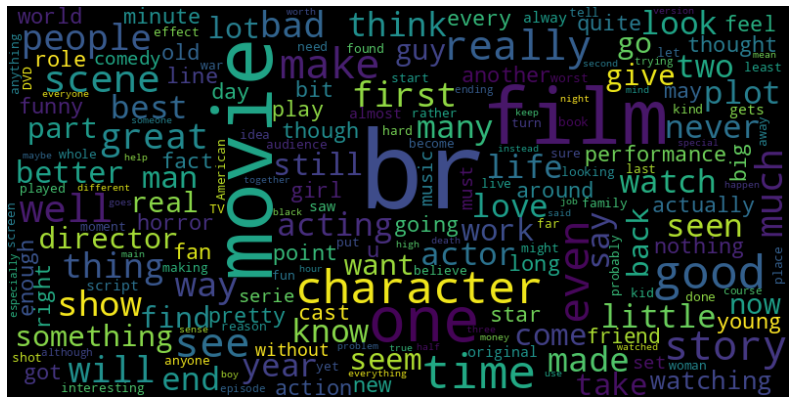

In [20]:
plt.figure(figsize=(14,10))
plt.imshow(nuvem_palavras,interpolation='bilinear')
plt.axis('off')
plt.show()

#### Separando palavras negativas e positivas

In [21]:
df_pos = df.query('sentiment == "positive"')
df_neg = df.query('sentiment == "negative"')

In [22]:
def nuvem_palavras(df):
    
    todas_palavras = ' '.join([texto for texto in df['review']])

    nuvem_palavras = WordCloud(width=800,height=400,
                           max_font_size=110,
                           collocations=False).generate(todas_palavras)
    
    plt.figure(figsize=(14,10))
    plt.imshow(nuvem_palavras,interpolation='bilinear')
    plt.axis('off')
    plt.show()

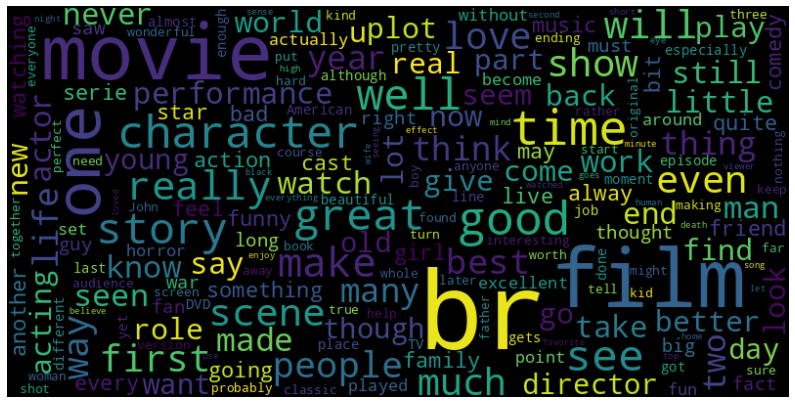

In [23]:
nuvem_palavras(df_pos)

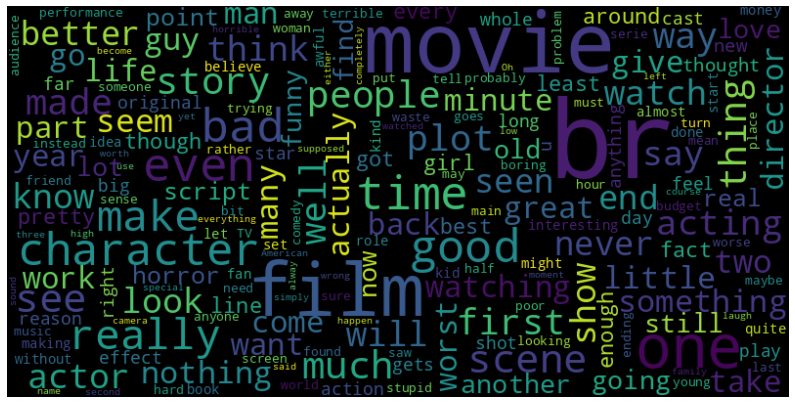

In [24]:
nuvem_palavras(df_neg)

## Tokenização e NLTK

In [25]:
from nltk import tokenize
import nltk

In [26]:
frase = 'Bem vindo ao mundo do PLN!'

token_espaco = tokenize.WhitespaceTokenizer()
token_espaco.tokenize(frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']

In [27]:
token_frase = token_espaco.tokenize(todas_palavras)

freq = nltk.FreqDist(token_frase)
freq

FreqDist({'the': 568735, 'a': 306960, 'and': 301919, 'of': 283625, 'to': 261850, 'is': 203056, 'in': 169981, 'I': 132498, 'that': 126818, 'this': 113726, ...})

In [28]:
df_freq = pd.DataFrame({'Palavra':list(freq.keys()),
                        'Frequencia':list(freq.values())})

In [29]:
df_freq

,Palavra,Frequencia
0,One,3460
1,of,283625
2,the,568735
3,other,15745
4,reviewers,413
...,...,...
438724,tragedy...the,1
438725,students...the,1
438726,"mom),",1
438727,"botch,",1


In [30]:
df_freq.nlargest(columns='Frequencia', n =10)

,Palavra,Frequencia
2,the,568735
52,a,306960
38,and,301919
1,of,283625
64,to,261850
22,is,203056
44,in,169981
151,I,132498
7,that,126818
21,this,113726


In [31]:
df_freq['percent'] = df_freq['Frequencia'] / df_freq['Frequencia'].sum()

In [32]:
df_freq.sort_values(by='Frequencia',ascending=False,inplace=True)

In [33]:
df_freq['percent_acumulada'] = df_freq['percent'].cumsum()

In [34]:
df_freq.head(10)

,Palavra,Frequencia,percent,percent_acumulada
2,the,568735,0.049208,0.049208
52,a,306960,0.026559,0.075766
38,and,301919,0.026122,0.101889
1,of,283625,0.024540,0.126428
64,to,261850,0.022656,0.149084
22,is,203056,0.017569,0.166653
44,in,169981,0.014707,0.181360
151,I,132498,0.011464,0.192823
7,that,126818,0.010972,0.203796
21,this,113726,0.009840,0.213636


## Nova visualização

In [35]:
import seaborn as sns

[Text(0, 0.5, 'Contagem')]

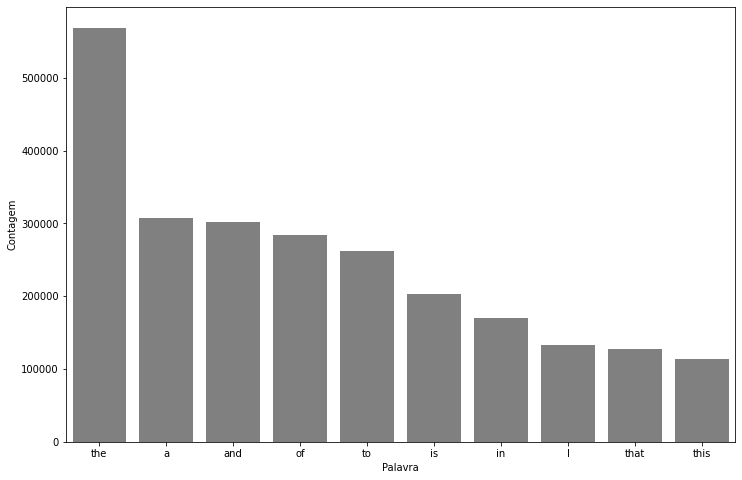

In [36]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df_freq.head(10),
                 x='Palavra',y='Frequencia',color='gray')
ax.set(ylabel = 'Contagem')

## Tratamento nos dados

In [37]:
palavras_irrelevantes = nltk.corpus.stopwords.words('english')

In [38]:
frase_processada = list()

for opiniao in df.review:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)     
    frase_processada.append(' '.join(nova_frase))


In [39]:
df['tratamento_1'] = frase_processada

In [40]:
df

,review,sentiment,class,tratamento_1
0,One of the other reviewers has mentioned that ...,positive,1,One reviewers mentioned watching 1 Oz episode ...
1,A wonderful little production. <br /><br />The...,positive,1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...,positive,1,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,0,Basically there's family little boy (Jake) thi...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"Petter Mattei's ""Love Time Money"" visually stu..."
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1,I thought movie right good job. It creative or...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...,negative,0,I Catholic taught parochial elementary schools...
49998,I'm going to have to disagree with the previou...,negative,0,I'm going disagree previous comment side Malti...


In [41]:
classificar_texto(df,'tratamento_1','class')

0.70824

In [42]:
todas_palavras = ' '.join([texto for texto in df['tratamento_1']])

In [43]:
token_frase = token_espaco.tokenize(todas_palavras)

freq = nltk.FreqDist(token_frase)
df_freq = pd.DataFrame({'Palavra':list(freq.keys()),
                        'Frequencia':list(freq.values())})

In [44]:
df_freq.nlargest(columns='Frequencia', n =20)

,Palavra,Frequencia
113,I,132498
13,/><br,100974
112,The,67317
326,movie,60762
338,film,54277
204,one,41334
349,like,36028
32,This,24329
92,would,23578
445,good,22582


# Curso de Linguagem Natural parte 2:
## continuando com análise de sentimento

## Tratamento 2

In [45]:
from nltk import tokenize


frase = 'Olá mundo!'
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


In [48]:
from string import punctuation

pontuacao = [pontuacao for pontuacao in punctuation]

In [49]:
pontuacao_stop_words = pontuacao + palavras_irrelevantes

In [51]:
frase_processada = list()

for opiniao in df['tratamento_1']:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stop_words:
            nova_frase.append(palavra)     
    frase_processada.append(' '.join(nova_frase))

df['tratamento_2'] = frase_processada

In [52]:
df['tratamento_2'] = frase_processada

In [53]:
df

,review,sentiment,class,tratamento_1,tratamento_2
0,One of the other reviewers has mentioned that ...,positive,1,One reviewers mentioned watching 1 Oz episode ...,One reviewers mentioned watching 1 Oz episode ...
1,A wonderful little production. <br /><br />The...,positive,1,A wonderful little production. <br /><br />The...,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...,positive,1,I thought wonderful way spend time hot summer ...,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,0,Basically there's family little boy (Jake) thi...,Basically there's family little boy (Jake) thi...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"Petter Mattei's ""Love Time Money"" visually stu...","Petter Mattei's ""Love Time Money"" visually stu..."
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1,I thought movie right good job. It creative or...,I thought movie right good job. It creative or...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0,"Bad plot, bad dialogue, bad acting, idiotic di...","Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...,negative,0,I Catholic taught parochial elementary schools...,I Catholic taught parochial elementary schools...
49998,I'm going to have to disagree with the previou...,negative,0,I'm going disagree previous comment side Malti...,I'm going disagree previous comment side Malti...


## Tratamento 3

In [59]:
import unidecode


In [60]:
sem_acentos = [unidecode.unidecode(texto) for texto in df['tratamento_2']]

In [62]:
stopwords_sem_acentos = [unidecode.unidecode(texto) for texto in pontuacao_stop_words]

In [63]:
df['tratamento_3'] = sem_acentos

frase_processada = list()

for opiniao in df['tratamento_2']:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stop_words:
            nova_frase.append(palavra)     
    frase_processada.append(' '.join(nova_frase))

df['tratamento_3'] = frase_processada

In [64]:
df.head()

,review,sentiment,class,tratamento_1,tratamento_2,tratamento_3
0,One of the other reviewers has mentioned that ...,positive,1,One reviewers mentioned watching 1 Oz episode ...,One reviewers mentioned watching 1 Oz episode ...,One reviewers mentioned watching 1 Oz episode ...
1,A wonderful little production. <br /><br />The...,positive,1,A wonderful little production. <br /><br />The...,A wonderful little production. <br /><br />The...,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...,positive,1,I thought wonderful way spend time hot summer ...,I thought wonderful way spend time hot summer ...,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,0,Basically there's family little boy (Jake) thi...,Basically there's family little boy (Jake) thi...,Basically there's family little boy (Jake) thi...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"Petter Mattei's ""Love Time Money"" visually stu...","Petter Mattei's ""Love Time Money"" visually stu...","Petter Mattei's ""Love Time Money"" visually stu..."


In [66]:
classificar_texto(df,'review','class')

0.652

In [67]:
classificar_texto(df,'tratamento_1','class')

0.70824

In [68]:
classificar_texto(df,'tratamento_2','class')

0.70824

In [69]:
classificar_texto(df,'tratamento_3','class')

0.70824

In [70]:
def nuvem_palavras(df,coluna):
    
    todas_palavras = ' '.join([texto for texto in df[coluna]])

    nuvem_palavras = WordCloud(width=800,height=400,
                           max_font_size=110,
                           collocations=False).generate(todas_palavras)
    
    plt.figure(figsize=(14,10))
    plt.imshow(nuvem_palavras,interpolation='bilinear')
    plt.axis('off')
    plt.show()

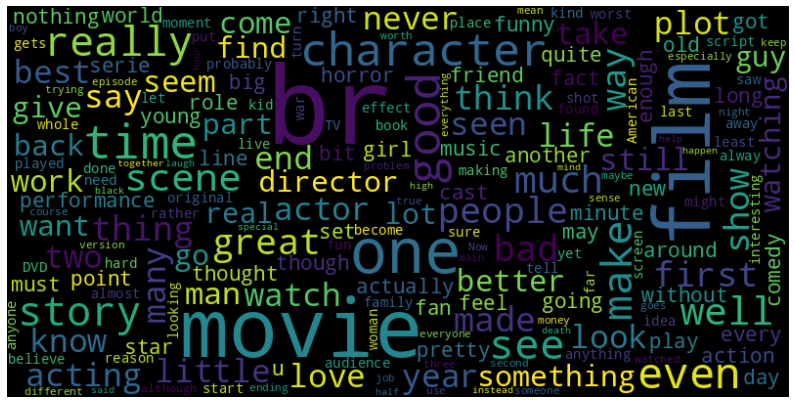

In [71]:
nuvem_palavras(df,'tratamento_3')

In [72]:
todas_palavras = ' '.join([texto for texto in df['tratamento_3']])


token_frase = token_espaco.tokenize(todas_palavras)

freq = nltk.FreqDist(token_frase)
df_freq = pd.DataFrame({'Palavra':list(freq.keys()),
                        'Frequencia':list(freq.values())})

In [73]:
df_freq.nlargest(columns='Frequencia',n=10)

,Palavra,Frequencia
113,I,132498
13,/><br,100974
112,The,67317
325,movie,60762
337,film,54277
204,one,41334
348,like,36028
32,This,24329
92,would,23578
444,good,22582


## Tratamento 4

In [74]:
frase_processada = list()

for opiniao in df['tratamento_3']:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acentos:
            nova_frase.append(palavra)     
    frase_processada.append(' '.join(nova_frase))

df['tratamento_4'] = frase_processada

In [83]:
df['tratamento_4'] = df['tratamento_4'].str.replace('<br /><br />','')

In [85]:
df['tratamento_4']



0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production. the filming techn...
2        thought wonderful way spend time hot summer we...
3        basically there's family little boy (jake) thi...
4        petter mattei's "love time money" visually stu...
                               ...                        
49995    thought movie right good job. creative origina...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    catholic taught parochial elementary schools n...
49998    i'm going disagree previous comment side malti...
49999    one expects star trek movies high art, fans ex...
Name: tratamento_4, Length: 50000, dtype: object

In [86]:
tokenize

<module 'nltk.tokenize' from '/home/franciscofoz/.local/lib/python3.10/site-packages/nltk/tokenize/__init__.py'>

In [84]:
classificar_texto(df,'tratamento_4','class')

0.71152

In [82]:
df['tratamento_4']

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production. <br /><br />the f...
2        thought wonderful way spend time hot summer we...
3        basically there's family little boy (jake) thi...
4        petter mattei's "love time money" visually stu...
                               ...                        
49995    thought movie right good job. creative origina...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    catholic taught parochial elementary schools n...
49998    i'm going disagree previous comment side malti...
49999    one expects star trek movies high art, fans ex...
Name: tratamento_4, Length: 50000, dtype: object